# Ridge Regression on ContextAware and DecadeAware system

In [6]:
library(tidyverse)
library(caret)
library(glmnet)
library(dplyr)
#library(psych) 
set.seed(1991)

In [7]:
CompoundAware_DecadeAware<-read.csv('CompoundAware_DecadeAware.csv',sep = '\t')

In [8]:
Y <- CompoundAware_DecadeAware %>% select(compound_mean) %>% scale(center = TRUE, scale = FALSE) %>% as.double()
X <- CompoundAware_DecadeAware %>% select(-c(1:8)) %>% as.matrix()

We use Ridge Regression to find a linear relationship between the features (PPMI, Local Mutual Information, Log Likelihood and the three similarity features) and compound_mean from the Reddy dataset for the 80 compounds.

In [11]:
lambda <- 10^seq(-3, 3, length = 100)


In [12]:
ridge <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std, 
    data = CompoundAware_DecadeAware, method = "glmnet",
  trControl = trainControl("cv", number = 10,search="grid"),
  tuneGrid = expand.grid(alpha = 0, lambda = lambda)
  )

elastic <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std,
    data = CompoundAware_DecadeAware, method = "glmnet",
  trControl = trainControl("cv", number = 10,search="grid"),
  tuneLength = 10
  )

lasso <- train(
  compound_mean ~. -modifier -head -modifier_mean -modifier_std -head_mean -head_std -compound_std,
    data = CompoundAware_DecadeAware, method = "glmnet",
  trControl = trainControl("cv", number = 10,search="grid"),
  tuneGrid = expand.grid(alpha = 1, lambda = lambda)
  )
# Model coefficients
#coef(ridge$finalModel, ridge$bestTune$lambda)
# Make predictions
#predictions <- ridge %>% predict(test.data)
# Model prediction performance
#data.frame(
#  RMSE = RMSE(predictions, test.data$medv),
#  Rsquare = R2(predictions, test.data$medv)
#)

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."

In [15]:
getTrainPerf(elastic)

TrainRMSE,TrainRsquared,TrainMAE,method
1.116534,0.470976,0.9402156,glmnet


In [14]:
models <- list(ridge = ridge, lasso = lasso, elastic = elastic)
resamples(models) %>% summary( metric = "RMSE")


Call:
summary.resamples(object = ., metric = "RMSE")

Models: ridge, lasso, elastic 
Number of resamples: 10 

RMSE 
             Min.   1st Qu.   Median     Mean  3rd Qu.     Max. NA's
ridge   1.0089617 1.1438440 1.302354 1.412966 1.407010 2.792957    0
lasso   0.7428728 1.0887137 1.202750 1.196903 1.346599 1.563336    0
elastic 0.7892350 0.8865068 1.018651 1.116534 1.338174 1.587115    0


In [71]:
dev.new(width = 550, height = 900, unit = "px")

Variable Importance is used to look at the importance of a feature in predicting compound_mean. We show the top 20 features out of the possible 126 (21 decades * 6 features).

When we look at the features irrespective of the decade,

log ratio is the most important and occupies 11/20 positions with local mutual information in the other 9. 

We do not see any of the similarity features being as important as the information theory based features. 

(This is good because previous studies only looked at similarity and frequencies, but never information theory features)

Given below is the distribution of the variables that were deemed important based on the decade

1800 : 1

1830 : 2

1840 : 2

1850 : 2

1860 : 2

1870 : 2

1880 : 2

1890 : 2

1900 : 2

1910 : 2

1920 : 1

( We need to figure out how and if the decade information makes any sense)

When we compare this model with the non temporal model, we get better R squared values, so we can say that temporal information is helping us predict the compositionality score.

In [16]:
varImp(elastic)

glmnet variable importance

  only 20 most important variables shown (out of 126)

                           Overall
X1870_log_ratio           100.0000
X1900_log_ratio            17.4930
X1870_sim_bw_constituents  16.9454
X1980_sim_bw_constituents  11.9729
X2000_log_ratio             7.3719
X1850_sim_bw_constituents   4.3976
X1810_sim_with_head         4.3776
X1990_sim_with_head         1.3141
X1980_ppmi                  1.0297
X1950_sim_with_head         0.8925
X1840_sim_with_modifier     0.7974
X2000_ppmi                  0.6576
X1930_sim_with_modifier     0.5131
X1920_ppmi                  0.4581
X1840_ppmi                  0.3696
X1990_ppmi                  0.3224
X1980_sim_with_head         0.1795
X1950_ppmi                  0.0000
X1960_local_mi              0.0000
X1890_sim_bw_constituents   0.0000

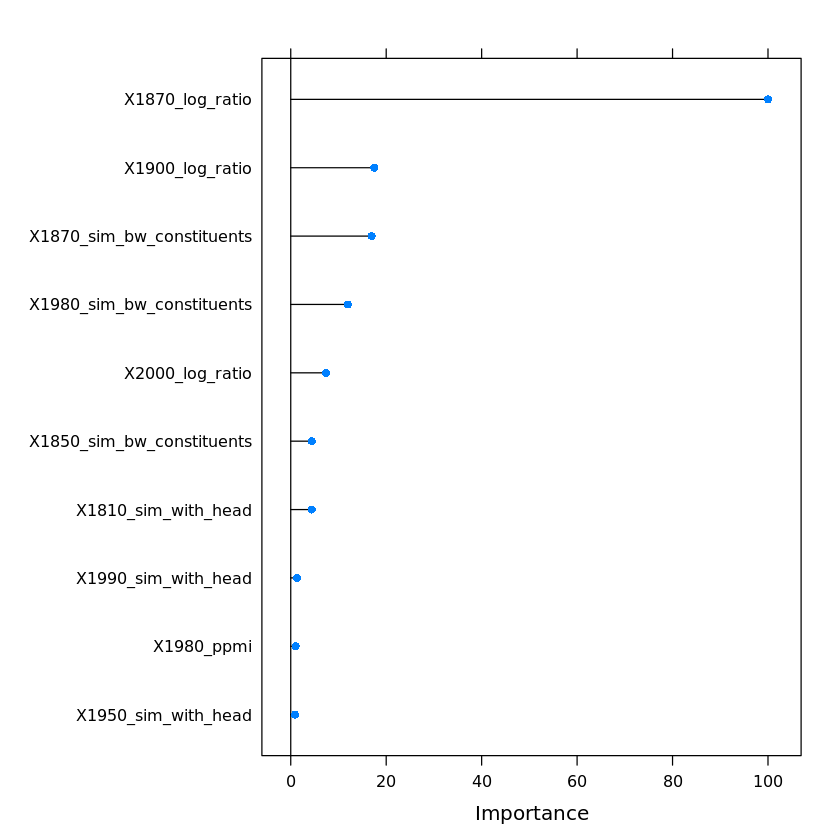

In [17]:
plot(varImp(elastic),top=10)